# ✅ 一维数据的均值和方差及归一化

In [1]:
import torch

In [2]:
a = torch.tensor([[-3.0, -2.0,-1.0,1.0,2.0,3.0]])
std,mean=torch.std_mean(a, unbiased=False)
print(f"标准差为：{std},均值为：{mean}")

标准差为：2.1602468490600586,均值为：0.0


In [3]:
import math
math.sqrt((1+4+9)*2/6)

2.160246899469287

In [4]:
a_norm=(a-mean)/std
print(f"归一化后的数据为：{a_norm}")
std,mean=torch.std_mean(a_norm, unbiased=False)
print(f"归一化后数据的标准差为：{std},均值为：{mean}")

归一化后的数据为：tensor([[-1.3887, -0.9258, -0.4629,  0.4629,  0.9258,  1.3887]])
归一化后数据的标准差为：1.0,均值为：0.0


# ✅ 图像数据的均值和方差

## 🔳 查看原图的数据分布

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [6]:
image=Image.open("../pytorch/img/cat1.jpg")
# image.show()  # 可以用这个展示图片，但是会打开系统的照片查看器

Text(0.5, 1.0, 'distribution of pixels')

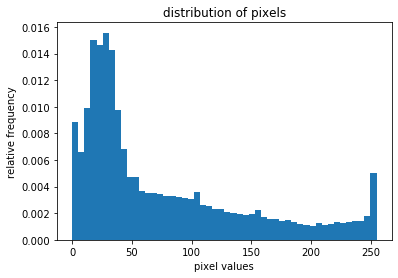

In [7]:
img_np_raw = np.array(image)

#  ravel() 把数组压平
plt.hist(img_np_raw.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [8]:
print(f"正常img的shape：{img_np_raw.shape},ravel之后的shape:{img_np_raw.ravel().shape}")

正常img的shape：(400, 500, 3),ravel之后的shape:(600000,)


In [9]:
img_np_raw[1,:2,:4]

array([[16, 10,  0],
       [19, 13,  0]], dtype=uint8)

## 🔳 数值从0-255缩放到0-1之后的分布

In [10]:
import torch
import torchvision

In [11]:
image_tensor=torchvision.transforms.ToTensor()(image)
print(image_tensor[1,:2,:4],image_tensor.shape)

tensor([[0.0471, 0.0549, 0.0667, 0.0706],
        [0.0392, 0.0510, 0.0667, 0.0706]]) torch.Size([3, 400, 500])


Text(0.5, 1.0, 'distribution of pixels')

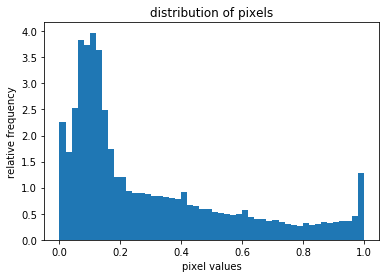

In [12]:
img_np = np.array(image_tensor)
  
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

**可以看到**
+ 除了数值大小变了，分布其实没有变。
+ 但是这样看，其实不好，单独去看每个通道的分布，其实才更有说服力（但是三个通道数值平铺在一起的分布都一样，那肯定单个通道也得一样）
+ 所以这样验证也没什么问题，没必要去验证三个

## 🔳 分别查看每个通道的分布变化

绘图参考：<https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot>

In [13]:
import pandas as pd

In [14]:
img_np_raw.shape

(400, 500, 3)

In [15]:
DF_raw=pd.DataFrame({"channel0":img_np_raw[:,:,0].ravel(),"channel1":img_np_raw[:,:,1].ravel(),"channel2":img_np_raw[:,:,2].ravel()})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F145B3A208>,
      dtype=object)

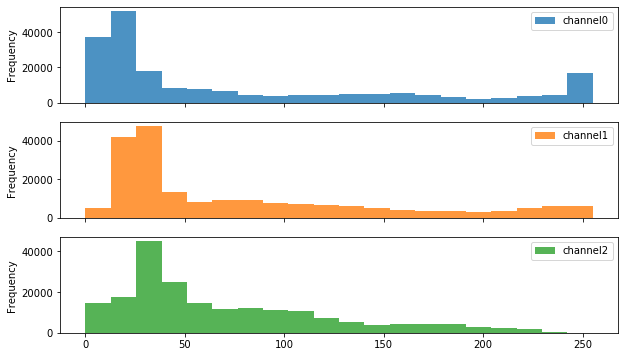

In [16]:
DF_raw.plot.hist(bins=20, alpha=0.8,subplots=True,figsize=(10,6))

+ **三个通道分布非常接近。。。几乎看不出来区别**
+ **那还是放在一起看吧，明显一点**



### ☑ 原图的通道分布

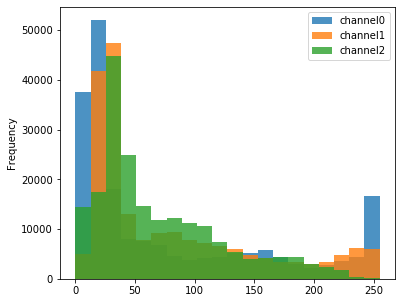

In [17]:
DF_raw.plot.hist(bins=20, alpha=0.8,figsize=(6,5)) 

In [18]:
DF_raw.shape

(200000, 3)

### ☑ 0-1的图像的通道分布

In [19]:
# image_tensor=torchvision.transforms.ToTensor()(image)
# img_np = np.array(image_tensor)

img_np.shape

(3, 400, 500)

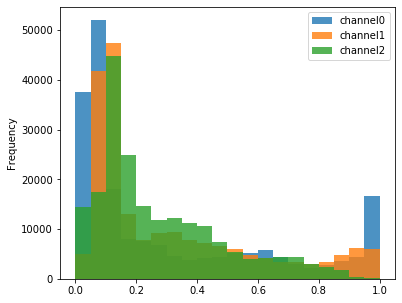

In [20]:
DF=pd.DataFrame({"channel0":img_np[0].ravel(),"channel1":img_np[1].ravel(),"channel2":img_np[2].ravel()})
DF.plot.hist(bins=20, alpha=0.8,figsize=(6,5)) 

In [21]:
DF.shape

(200000, 3)

### ☑ 0-255图像显示和0-1图像显示

突然有个疑问，0-1数值范围的图像是不是也可以被正常展示为图像？

In [22]:
img_np_raw.shape,img_np_raw[:2,:3,1]

((400, 500, 3),
 array([[12, 14, 17],
        [10, 13, 17]], dtype=uint8))

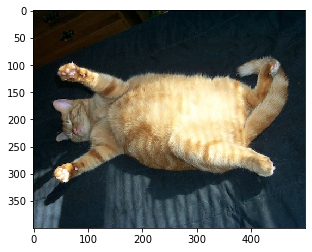

In [23]:
plt.imshow(img_np_raw)

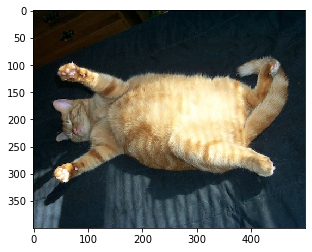

In [24]:
image_tensor_img=torchvision.transforms.ToPILImage()(image_tensor)
plt.imshow(image_tensor_img)

In [25]:
np.array(image_tensor_img).shape,np.array(image_tensor_img)[:2,:3,1]

((400, 500, 3),
 array([[12, 14, 17],
        [10, 13, 17]], dtype=uint8))

所以起码对于imshow来说，不管图像是0-255，还是0-1，都是可以被显示的。

其实文档里写的很清楚，在[imshow的官方文档](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)里:
```python
Xarray-like or PIL image
The image data. Supported array shapes are:

(M, N): an image with scalar data. The values are mapped to colors using normalization and a colormap. See parameters norm, cmap, vmin, vmax.

(M, N, 3): an image with RGB values (0-1 float or 0-255 int).

(M, N, 4): an image with RGBA values (0-1 float or 0-255 int), i.e. including transparency.

The first two dimensions (M, N) define the rows and columns of the image.

Out-of-range RGB(A) values are clipped.
```

明确支持**0-1的浮点数**或者**0-255的整数形式**的RGB图片

## 🔳 计算一张图像的均值和方差

In [26]:
image_tensor.shape

torch.Size([3, 400, 500])

In [27]:
std,mean=torch.std_mean(image_tensor,dim=[1,2],keepdim=True)

In [28]:
print(f"当前这张图的标准差为：\n{std}\n均值为：\n{mean}")

当前这张图的标准差为：
tensor([[[0.3242]],

        [[0.2742]],

        [[0.2087]]])
均值为：
tensor([[[0.3033]],

        [[0.3082]],

        [[0.2720]]])


这里dim的写法，其实和**BN层计算时**很像，不确定的去复习一下`28.BN(批量归一化).ipynb`部分，如下：
```python
else: # 对于卷积层来说，作用在通道维度(也就是把所有通道对应位置加起来，求平均，得到的应该是 1x通道的高x通道的宽 这么一个矩阵 )
    mean=X.mean(dim=(0,2,3),keepdim=True) # 这里最终得到的就是 1xnx1x1的一个4d的结果，n表示输入/输出通道数
    var=((X-mean)**2).mean(dim=(0,2,3),keepdim=True)
```
+ 其实基本是一样的，BN的0维是batch_size维度，2和3也分别是长和宽，唯一漏掉的那个1其实是通道维度。
+ 这里求均值和标准差其实也是除通道维之外其他所有维度
+ 所以**其实可以一次求出对应三个通道的均值和方差**
+ **不像之前网上大部分求均值和方差都是for循环一个通道一个通道的求**

# ✅ 对图像进行normalize

## 🔳 直接公式norm的结果

In [29]:
image_norm=(image_tensor-mean)/std

In [30]:
import torch
norm_std,norm_mean=torch.std_mean(image_norm,dim=[1,2],keepdim=True)
torch.set_printoptions(precision=4,sci_mode=False)
print(f"当前这张图的norm后的标准差为：\n{norm_std}\n均值为：\n{norm_mean}")

当前这张图的norm后的标准差为：
tensor([[[1.]],

        [[1.]],

        [[1.]]])
均值为：
tensor([[[    0.0000]],

        [[    0.0000]],

        [[    0.0000]]])


##  🔳 使用torch的normalize函数

**在得到均值和方差之后，就可以看normalize了**

torch官方文档：<https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html>

In [31]:
image_norm_pytorch=torchvision.transforms.Normalize(mean,std)(image_tensor)
pytorch_std,pytorch_mean=torch.std_mean(image_norm_pytorch,dim=[1,2],keepdim=True)
torch.set_printoptions(precision=4,sci_mode=False)
print(f"当前这张图的norm后的标准差为：\n{pytorch_std}\n均值为：\n{pytorch_mean}")

当前这张图的norm后的标准差为：
tensor([[[1.]],

        [[1.]],

        [[1.]]])
均值为：
tensor([[[    0.0000]],

        [[    0.0000]],

        [[    0.0000]]])


In [32]:
torch.equal(image_norm_pytorch, image_norm)

True

## 🔳 查看归一化后图像分布/均值方差/图像

直接看三个通道压平在一起的就可以，没必要三个通道分别看了

### ☑ 使用`ToPILImage`

如果使用了`ToPILImage`，则数值范围就恢复到0-255了

先看**三个通道放在一起**的

Text(0.5, 1.0, 'distribution of pixels')

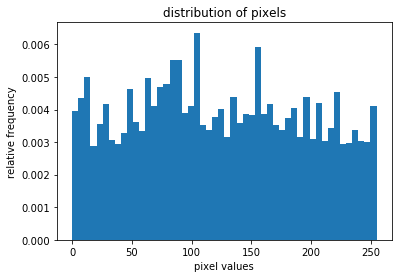

In [74]:
image_tensor=torchvision.transforms.ToTensor()(image)
image_norm_pytorch=torchvision.transforms.Normalize(mean,std)(image_tensor)

image_norm_pytorch2img=torchvision.transforms.ToPILImage()(image_norm_pytorch)
plt.hist(np.array(image_norm_pytorch2img).ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

**三个通道分布分别看**

(400, 500, 3)


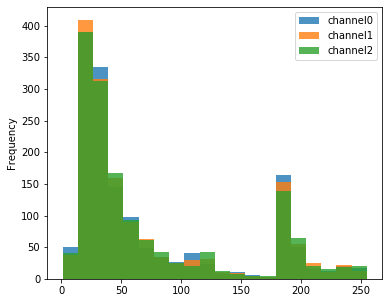

In [34]:
img_norm_arrayPIL = np.array(image_norm_pytorch2img)
print(img_norm_arrayPIL.shape)
DF_norm_PIL=pd.DataFrame({"channel0":img_norm_arrayPIL[0].ravel(),"channel1":img_norm_arrayPIL[1].ravel(),"channel2":img_norm_arrayPIL[2].ravel()})
DF_norm_PIL.plot.hist(bins=20, alpha=0.8,figsize=(6,5)) 

**计算均值和方差**

In [35]:
for i in range(3):
    mean=img_norm_arrayPIL[i].ravel().mean()
    std=img_norm_arrayPIL[i].ravel().std()
    print(f"通道{i}的均值为：{mean},方差为：{std}")

通道0的均值为：71.30533333333334,方差为：67.00028933934207
通道1的均值为：71.39733333333334,方差为：66.64137448229057
通道2的均值为：72.55066666666667,方差为：67.17472316942504


**normalization+ToPILImage的后的图像**

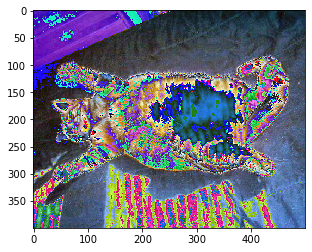

In [36]:
plt.imshow(np.array(image_norm_pytorch2img))

### ☑不使用`ToPILImage`

先看**三个通道放在一起**的

Text(0.5, 1.0, 'distribution of pixels')

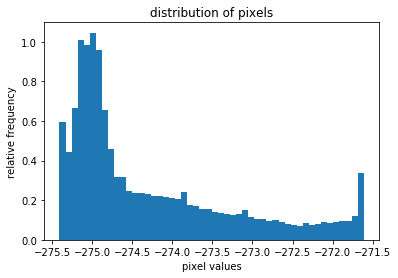

In [37]:
image_tensor=torchvision.transforms.ToTensor()(image)
image_norm_pytorch=torchvision.transforms.Normalize(mean,std)(image_tensor)
# image_norm_pytorch2img=torchvision.transforms.ToPILImage()(image_norm_pytorch)

plt.hist(255*np.array(image_norm_pytorch).ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

**三个通道分布分别看**

(3, 400, 500)


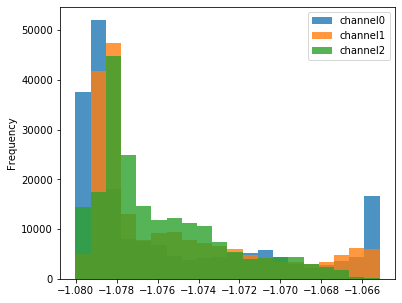

In [38]:
img_norm_array = np.array(image_norm_pytorch)
print(img_norm_array.shape)
DF_norm=pd.DataFrame({"channel0":img_norm_array[0].ravel(),"channel1":img_norm_array[1].ravel(),"channel2":img_norm_array[2].ravel()})
DF_norm.plot.hist(bins=20, alpha=0.8,figsize=(6,5)) 

**计算均值和方差**

In [39]:
torch.set_printoptions(precision=4,sci_mode=False)
%precision 3

import pandas as pd
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format

for i in range(3):
    mean=img_norm_array[i].ravel().mean()
    std=img_norm_array[i].ravel().std()
    print(f"通道{i}的均值为：{mean},方差为：{std}")

通道0的均值为：-1.075514316558838,方差为：0.004825998563319445
通道1的均值为：-1.0754406452178955,方差为：0.0040818206034600735
通道2的均值为：-1.0759797096252441,方差为：0.0031068800017237663


+ 虽然这个normalization后的图像确实看起来不太像正态分布，但是最后算下来均值确实为0，方差为1.。。。。、
+ 所以确实没什么问题

**normalization不加ToPILImage的后的图像**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


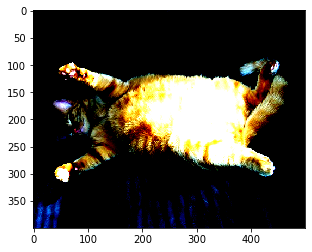

In [70]:
image_tensor=torchvision.transforms.ToTensor()(image)
image_norm_pytorch=torchvision.transforms.Normalize(mean,std)(image_tensor)
img_norm_array = np.array(image_norm_pytorch)
image_norm_pytorch=image_norm_pytorch.permute(1,2,0)
plt.imshow(image_norm_pytorch)

+ 这里需要换轴，将img_norm_array的形状从`(3, 400, 500)`，变成`(400, 500，3)`。
+ 直接用`reshape`得到的结果不正确。
+ 参考：[Convert pytorch tensor to numpy, and reshape](https://stackoverflow.com/questions/58356756/convert-pytorch-tensor-to-numpy-and-reshape)，这里面可能会有一些正确的东西
+ 以及：[torch.permute()和np.transpose()](https://blog.csdn.net/qq_34806812/article/details/89385831)

In [ ]:
img_tensor_normalized = img_tensor_normalized.permute(1, 2, 0)
plt.imshow(img_tensor_normalized)

> + 由于Normalization改变了图像范围，不再是0-1或者是0-255范围，甚至出现了负值，
> + 所以直接绘制normalization的结果，在语义上是没有意义的

**下面这个其实没有意义，并不正确！**

In [41]:
img_norm_array.max(),img_norm_array.min(),img_norm_array.mean(),img_norm_array.std()

(-1.0651428, -1.0800292, -1.0756449, 0.0040732934)

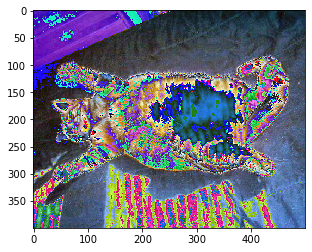

In [42]:
plt.imshow(np.array(image_norm_pytorch2img)/255.0)

## 🔳 数据操作的可逆关系

In [43]:
print(f"array(image)的情况：\nshape为：{np.array(image).shape},\n[:2,:3,1]对应的数据为：\n{np.array(image)[:2,:3,1]}\n")
print(f"image_tensor(ToTensor(image))的情况：\nshape为：{image_tensor.shape},\n[1,:2,:3]对应的数据为：\n{image_tensor[1,:2,:3]}\n")
print(f"image_norm_pytorch(Normalize(image_tensor))的情况：\nshape为：{image_norm_pytorch.shape},\n[1,:2,:3]对应的数据为：\n{image_norm_pytorch[1,:2,:3]}\n")
print(f"image_norm_pytorch2img(ToPILImage(image_norm_pytorch))的情况：\nshape为：{np.array(image_norm_pytorch2img).shape},\n[:2,:3,1]对应的数据为：\n{np.array(image_norm_pytorch2img)[:2,:3,1]}")

array(image)的情况：
shape为：(400, 500, 3),
[:2,:3,1]对应的数据为：
[[12 14 17]
 [10 13 17]]

image_tensor(ToTensor(image))的情况：
shape为：torch.Size([3, 400, 500]),
[1,:2,:3]对应的数据为：
tensor([[0.0471, 0.0549, 0.0667],
        [0.0392, 0.0510, 0.0667]])

image_norm_pytorch(Normalize(image_tensor))的情况：
shape为：torch.Size([3, 400, 500]),
[1,:2,:3]对应的数据为：
tensor([[-1.0793, -1.0792, -1.0790],
        [-1.0794, -1.0793, -1.0790]])

image_norm_pytorch2img(ToPILImage(image_norm_pytorch))的情况：
shape为：(400, 500, 3),
[:2,:3,1]对应的数据为：
[[14 21 32]
 [ 6 17 32]]


数据操作的一些可逆关系：
+ **image_tensor=ToTensor(image)↔image=image_tensor\*255↔image=ToPILImage(image_tensor)**

In [44]:
print("0-255数据范围和0-1数值范围之间转换")
print(f"\nimage_tensor*255结果为：\n{image_tensor[1,:2,:3]*255}")
print(f"\nToPILImage(image_tensor)结果为：\n{np.array(torchvision.transforms.ToPILImage()(image_tensor))[:2,:3,1]}")

0-255数据范围和0-1数值范围之间转换

image_tensor*255结果为：
tensor([[12., 14., 17.],
        [10., 13., 17.]])

ToPILImage(image_tensor)结果为：
[[12 14 17]
 [10 13 17]]


+ **如果想把norm后的结果复原成PIL，需要$(norm\times std + mean)\times 255$**

In [45]:
print("ToTensor+Normalization之后的结果复原")

image_tensor=torchvision.transforms.ToTensor()(image)
std,mean=torch.std_mean(image_tensor,dim=[1,2],keepdim=True)
norm2PIL=(image_norm_pytorch*std+mean)*255
norm2PIL.shape,norm2PIL[1,:2,:3]

ToTensor+Normalization之后的结果复原


(torch.Size([3, 400, 500]),
 tensor([[3.1363, 3.1445, 3.1567],
         [3.1281, 3.1404, 3.1567]]))

## 🔳 分布的可逆

In [46]:
img_norm_array.max(),img_norm_array.min(),img_norm_array.mean(),img_norm_array.std()

(-1.0651428, -1.0800292, -1.0756449, 0.0040732934)

很明显，可以看到上面使用`ToPILImage`和不使用`ToPILImage`的分布不同。
+ 在经过normalization之后，**数据已经从ToTensor的0-1范围，变成了-1~3.5左右的范围**。
+ 因此此时**再使用ToPILImage()函数去转换，其实数据范围上是有问题的**

## 🔳 结论

**0️⃣维度变化**
+ 默认PIL图像转换为numpy的array之后，其shape每个维度表示的是（长、宽、通道数），例如(400,500,3)
+ 而pytorch的ToTensor，会将PIL图像转为(通道数，长，宽)，例如（3,400,500）

**1️⃣分布变化**
+ 观察上面，无论是单个通道还是三个通道压平一起，对于同一张图，0-255和0-1这种数值表示的转换不会影响其分布

**2️⃣数据变化**
+ norm\*std+mean可以变会原图

**3️⃣ToTensor和ToPILImage**是完全相反的，
+ ToTensor：
    + 对于np.array(PIL.Image)，这种图像原始的维度是：(C,H,W),数值范围是0-255，
    + 使用ToTensor之后，会变成(W,C,H)的维度，同时数值范围变为0-1
+ ToPILImage：
   +  对于从图像转来的Tensor，这种数据原始的维度是：(W,C,H)，数值范围0-1，
   + 使用ToTensor之后，会变成(C,H,W)的维度，同时数值范围变为0-255
   
   
**4️⃣5️⃣**

# ✅ 其他尝试

参考自：
+ <https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/>
+ https://sparrow.dev/pytorch-normalize/

看一张新图试试

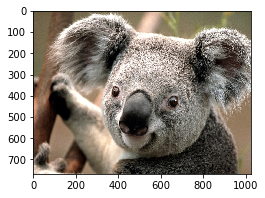

In [57]:
import requests
import io

resp = requests.get('https://media.geeksforgeeks.org/wp-content/uploads/20210420115223/Koalainputimage.jpg')
img = Image.open(io.BytesIO(resp.content))


plt.figure(figsize=(5,3))
plt.imshow(np.array(img))

原始分布

Text(0.5, 1.0, 'distribution of pixels')

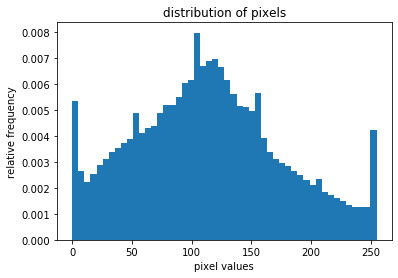

In [58]:
plt.hist(np.array(img).ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

转为tensor之后的分布直方图

Text(0.5, 1.0, 'distribution of pixels')

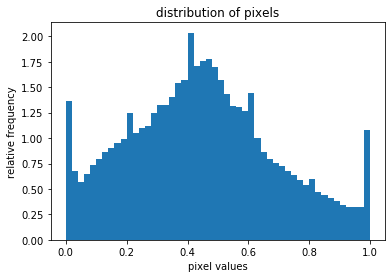

In [60]:
img_tensor=torchvision.transforms.ToTensor()(img)
plt.hist(np.array(img_tensor).ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

计算转换后的tensor的均值和方差

In [61]:
mean, std = img_tensor.mean([1,2]), img_tensor.std([1,2])
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.4916, 0.4498, 0.4000])
Std of the image: tensor([0.2474, 0.2362, 0.2322])


Text(0.5, 1.0, 'distribution of pixels')

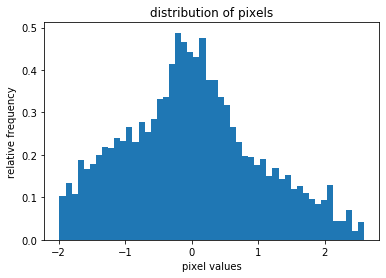

In [62]:
img_tensor_normalized=torchvision.transforms.Normalize(mean,std)(img_tensor)

plt.hist(np.array(img_tensor_normalized).ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

normalization但是不进行ToPILImage之后的图像

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


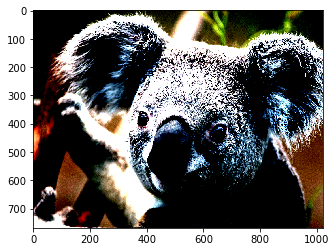

In [64]:
img_tensor_normalized = img_tensor_normalized.permute(1, 2, 0)
plt.imshow(img_tensor_normalized)

验证进行normalization操作后的均值和方差是否为0和1

In [77]:
mean, std = img_tensor.mean([1,2]), img_tensor.std([1,2])
img_tensor_normalized=torchvision.transforms.Normalize(mean,std)(img_tensor)
mean, std = img_tensor_normalized.mean([1,2]), img_tensor_normalized.std([1,2])
  
# print mean and std
print("Mean and Std of normalized image:")
print("Mean of the image:", mean)
print("Std of the image:", std)

Mean and Std of normalized image:
Mean of the image: tensor([    -0.0000,     -0.0000,     -0.0000])
Std of the image: tensor([1., 1., 1.])
